# Auswahl von Beschriftungen basierend auf ihrer Größe
Nachdem ein Bild segmentiert und Objekte beschriftet wurden, möchten wir möglicherweise Objekte entfernen, die entweder zu klein oder zu groß sind, um als Objekte, zum Beispiel _Zellkerne_, betrachtet zu werden.

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread
import matplotlib
import numpy as np
import stackview

# initialize GPU
cle.select_device("GTX")

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier0\_device.py:77: UserWarning: No OpenCL device found with GTX in their name. Using gfx1035 instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<gfx1035 on Platform: AMD Accelerated Parallel Processing (2 refs)>

Wir beginnen mit einer beschrifteten Version des Blobs-Bildes.

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
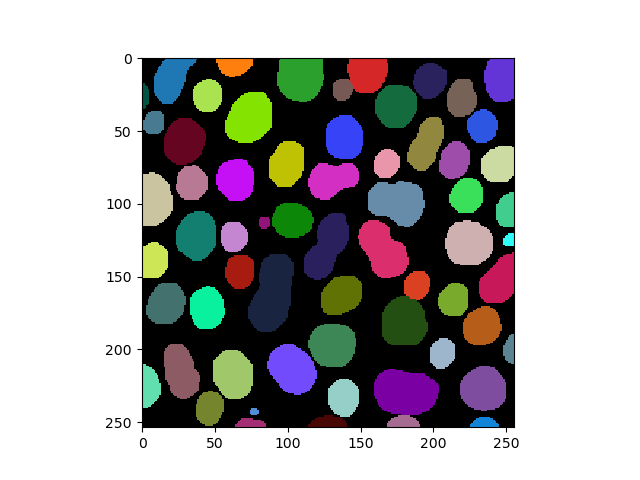

In [2]:
# load data
label_image = imread('../../data/blobs_labeled.tif')

stackview.insight(label_image)

Nehmen wir an, wir sind nicht an sehr kleinen Objekten interessiert, da sie möglicherweise das Ergebnis einer falschen Segmentierung von Rauschen sind. Wir wissen, dass die von uns abgebildeten Objekte eine bestimmte Mindestgröße haben. Ausgehend von dieser physikalischen Annahme müssen wir eine Anzahl von Pixeln (in 2D) oder Voxeln (in 3D) schätzen, die die Objekte groß sind. Wir können dann diese Zahl als `size_threshold` in Pixeln oder Voxeln verwenden.

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
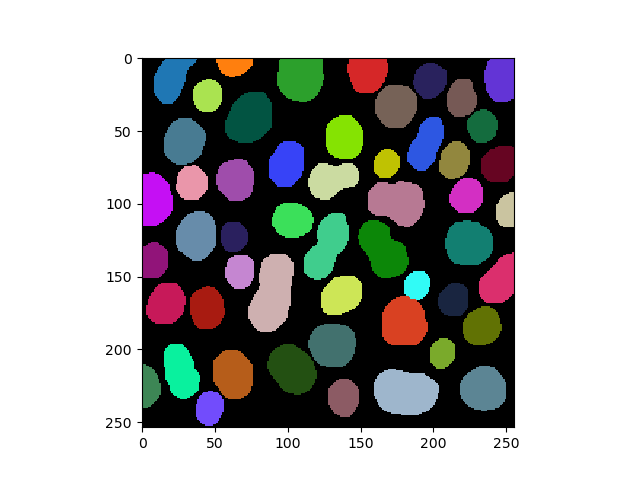

In [3]:
size_threshold = 200 # pixels

large_labels_only = cle.exclude_small_labels(label_image, maximum_size=size_threshold)

large_labels_only

Wir können eine ähnliche Funktion verwenden, um die Objekte, die oben entfernt wurden, in einem separaten Beschriftungsbild zu visualisieren.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
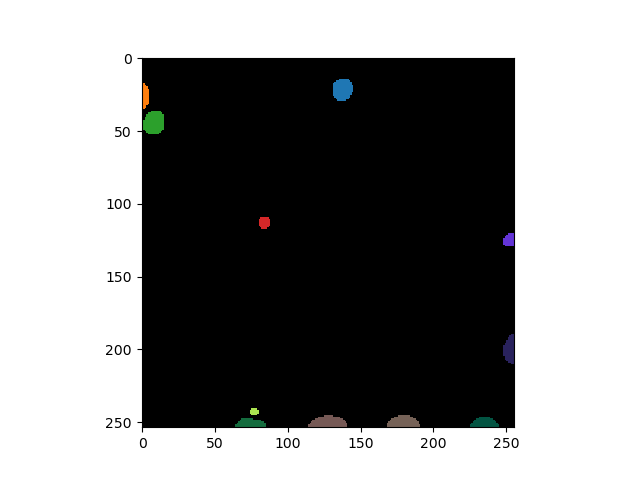

In [4]:
small_labels_only = cle.exclude_large_labels(label_image, minimum_size=size_threshold)

small_labels_only